In [171]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
def dist(a,b):
    return np.sqrt((a['x'] - b['x'])**2+(a['y'] - b['y'])**2)

def random_points(n):
    points = []
    for i in range(n):
        point = {}
        point['x'] = random.randint(0, 1000)
        point['y'] = random.randint(0, 1000)
        points.append(point)
    return points

def get_centroids(points, k):
    x_sum, y_sum = 0, 0
    for i in range(len(points)):
        x_sum += points[i]['x']
        y_sum += points[i]['y']
    x_sum /= len(points)
    y_sum /= len(points)

    center_point = {}
    center_point['x'], center_point['y'] = x_sum, y_sum
    R = 0
    for i in range(len(points)):
        R = max(R, dist(center_point, points[i]))
    centroids = []
    for i in range(k):
        centroid = {}
        centroid['x'] = x_sum + R * np.cos(2 * np.pi * i / k)
        centroid['y'] = y_sum + R * np.sin(2 * np.pi * i / k)
        centroids.append(centroid)
    return centroids

In [173]:
def kmeans(points, centroids):
    diff = 1
    cluster = np.zeros(len(points))
    while diff:
        for i, point in enumerate(points):
            min_dist = float('inf')
            for j, centroid in enumerate(centroids):
                d = dist(centroid, point);
                if min_dist > d:
                    min_dist = d
                    cluster[i] = j
        new_centroids =pd.DataFrame(points).groupby(by=cluster).mean().to_dict('records')
        if centroids == new_centroids:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [174]:
def visualize(centroids, labels, data):
    colors = ['r', 'g', 'b', 'y', 'purple', 'orange', 'pink', 'aqua']
    plt.figure(figsize=(7,7))
    for centroid in centroids:
        plt.scatter(centroid['x'], centroid['y'], marker='x', c='black')
    i = 0
    for x in data:
          plt.scatter(x['x'], x['y'], c=colors[int(labels[i])])
          i = i+1
    plt.show()

In [175]:
def get_kmeans_opt_centroid(point,k = 10):
    sum_list = []
    min = float('inf')
    for i in range(k):
        centroids = get_centroids(points, k)
        centroids, cluster = kmeans(points, centroids)
        sum = 0
        for i, point in enumerate(points):
            sum += dist(point, centroids[int(cluster[i])])
            sum_list.append(sum)
    for i in range(1, k-2):
        val = abs(sum_list[i+1] - sum_list[i]) / abs(sum_list[i-1] - sum_list[i])
        if (val < min):
            k_opt = i
            min = val           
    return k_opt

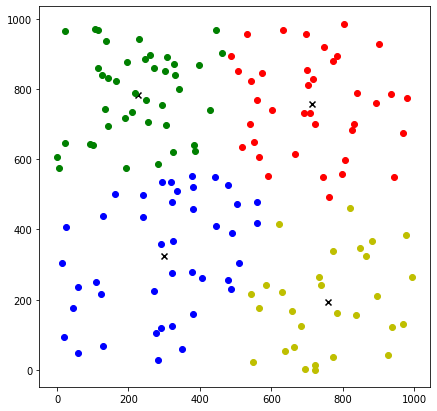

In [176]:
n = 150
points = random_points(n)
k_opt = get_kmeans_opt_centroid(points)
centr = get_centroids(points, k_opt)
centroids, cluster = kmeans(points, centr)
visualize(centroids, cluster, points)